# **Automatidata project**
**Course 5 - Regression Analysis: Simplify complex data relationships**

The data consulting firm Automatidata has recently hired you as the newest member of their data analytics team. Their newest client, the NYC Taxi and Limousine Commission (New York City TLC), wants the Automatidata team to build a multiple linear regression model to predict taxi fares using existing data that was collected over the course of a year. The team is getting closer to completing the project, having completed an initial plan of action, initial Python coding work, EDA, and A/B testing.

The Automatidata team has reviewed the results of the A/B testing. Now it’s time to work on predicting the taxi fare amounts. You’ve impressed your Automatidata colleagues with your hard work and attention to detail. The data team believes that you are ready to build the regression model and update the client New York City TLC about your progress.

A notebook was structured and prepared to help you in this project. Please complete the following questions.

# Course 5 End-of-course project: Build a multiple linear regression model

In this activity, you will build a multiple linear regression model. As you've learned, multiple linear regression helps you estimate the linear relationship between one continuous dependent variable and two or more independent variables. For data science professionals, this is a useful skill because it allows you to consider more than one variable against the variable you're measuring against. This opens the door for much more thorough and flexible analysis to be completed. 

Completing this activity will help you practice planning out and buidling a multiple linear regression model based on a specific business need. The structure of this activity is designed to emulate the proposals you will likely be assigned in your career as a data professional. Completing this activity will help prepare you for those career moments.
<br/>

**The purpose** of this project is to demostrate knowledge of EDA and a multiple linear regression model

**The goal** is to build a multiple linear regression model and evaluate the model
<br/>
*This activity has three parts:*

**Part 1:** EDA & Checking Model Assumptions
* What are some purposes of EDA before constructing a multiple linear regression model?

**Part 2:** Model Building and evaluation
* What resources do you find yourself using as you complete this stage?

**Part 3:** Interpreting Model Results

* What key insights emerged from your model(s)?

* What business recommendations do you propose based on the models built?

# Build a multiple linear regression model

<img src="images/Pace.png" width="100" height="100" align=left>

# **PACE stages**


Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

<img src="images/Plan.png" width="100" height="100" align=left>


## PACE: **Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.


### Task 1. Imports and loading
Import the packages that you've learned are needed for building linear regression models.

In [1]:
# Imports
# Packages for numerics + dataframes
import numpy as np
import pandas as pd

# Packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Packages for date conversions for calculating trip durations
from datetime import datetime
from dateutil.relativedelta import relativedelta

# Packages for OLS, MLR
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# Package for confusion matrix
from sklearn.metrics import confusion_matrix

**Note:** `Pandas` is used to load the NYC TLC dataset. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# Load dataset into dataframe 
df0=pd.read_csv("2017_Yellow_Taxi_Trip_Data.csv") # index_col parameter specified to avoid "Unnamed: 0" column when reading in data from csv

<img src="images/Analyze.png" width="100" height="100" align=left>

## PACE: **Analyze**

In this stage, consider the following question where applicable to complete your code response:

* What are some purposes of EDA before constructing a multiple linear regression model?


To know the relation between variables, to clean data

### Task 2a. Explore data with EDA

Analyze and discover data, looking for correlations, missing data, outliers, and duplicates.

Start with `.shape` and `.info()`.

In [4]:
# Start with `.shape` and `.info()`
### YOUR CODE HERE ###
df0.shape
df0.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

Check for missing data and duplicates using `.isna()` and `.drop_duplicates()`.

In [7]:
# Check for missing data and duplicates using .isna() and .drop_duplicates()
### YOUR CODE HERE ###
df0.drop_duplicates()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.00,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.00,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.00,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.00,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.00,0.3,17.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22694,14873857,2,02/24/2017 5:37:23 PM,02/24/2017 5:40:39 PM,3,0.61,1,N,48,186,2,4.0,1.0,0.5,0.00,0.00,0.3,5.80
22695,66632549,2,08/06/2017 4:43:59 PM,08/06/2017 5:24:47 PM,1,16.71,2,N,132,164,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20
22696,74239933,2,09/04/2017 2:54:14 PM,09/04/2017 2:58:22 PM,1,0.42,1,N,107,234,2,4.5,0.0,0.5,0.00,0.00,0.3,5.30
22697,60217333,2,07/15/2017 12:56:30 PM,07/15/2017 1:08:26 PM,1,2.36,1,N,68,144,1,10.5,0.0,0.5,1.70,0.00,0.3,13.00


Use `.describe()`.

In [8]:
# Use .describe()
### YOUR CODE HERE ###
df0.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


Check for missing data and duplicates using `.isna()` and `.drop_duplicates()`.

In [ ]:
# Check for missing data and duplicates using .isna() and .drop_duplicates()
### YOUR CODE HERE ###



Use `.describe()`.

In [ ]:
# Use .describe()
### YOUR CODE HERE ###



### Task 2b. Convert pickup & dropoff columns to datetime


In [10]:
# Check the format of the data
### YOUR CODE HERE ###
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

In [11]:
# Convert datetime columns to datetime
### YOUR CODE HERE ###
df0['tpep_pickup_datetime'] = pd.to_datetime(df0['tpep_pickup_datetime'])
df0['tpep_dropoff_datetime'] = pd.to_datetime(df0['tpep_dropoff_datetime'])


### Task 2c. Create duration column

Create a new column called `duration` that represents the total number of minutes that each taxi ride took.

In [19]:
# Create `duration` column
### YOUR CODE HERE ###
df0['duration'] = df0['tpep_dropoff_datetime'] - df0['tpep_pickup_datetime']


### Outliers

Call `df.info()` to inspect the columns and decide which ones to check for outliers.

In [20]:
### YOUR CODE HERE ###
df0.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype          
---  ------                 --------------  -----          
 0   Unnamed: 0             22699 non-null  int64          
 1   VendorID               22699 non-null  int64          
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns] 
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns] 
 4   passenger_count        22699 non-null  int64          
 5   trip_distance          22699 non-null  float64        
 6   RatecodeID             22699 non-null  int64          
 7   store_and_fwd_flag     22699 non-null  object         
 8   PULocationID           22699 non-null  int64          
 9   DOLocationID           22699 non-null  int64          
 10  payment_type           22699 non-null  int64          
 11  fare_amount            22699 non-null  float64        
 12  extra                  22699 non-null  float64

Keeping in mind that many of the features will not be used to fit your model, the most important columns to check for outliers are likely to be:
* `trip_distance`
* `fare_amount`
* `duration`



### Task 2d. Box plots

Plot a box plot for each feature: `trip_distance`, `fare_amount`, `duration`.

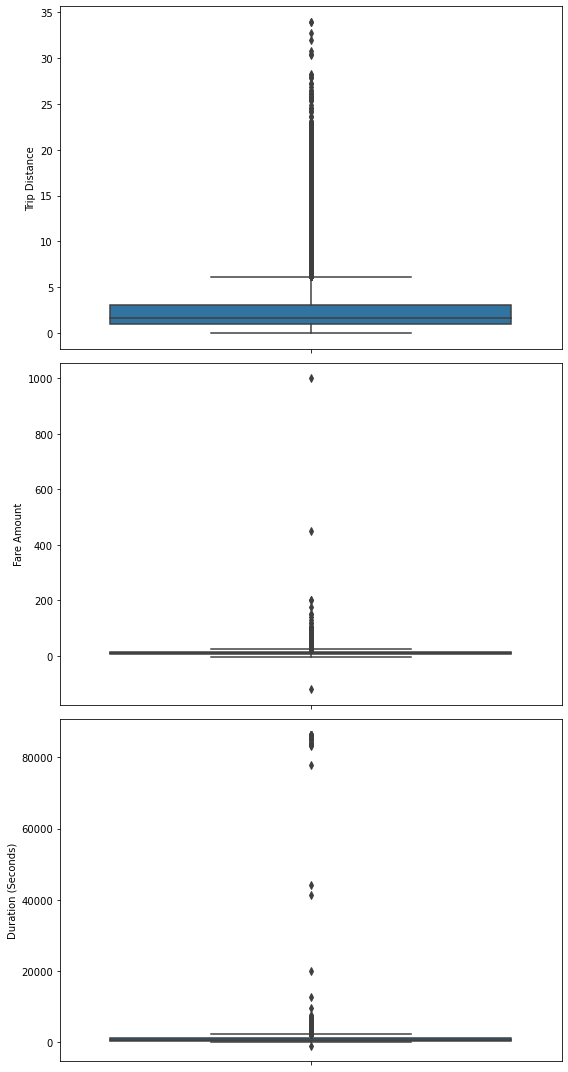

In [21]:
# Convert duration to seconds
df0['duration_seconds'] = df0['duration'].dt.total_seconds()

# Create subplots for the box plots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 15))

# Box plot for trip_distance
sns.boxplot(y=df0['trip_distance'], ax=axes[0])
axes[0].set_ylabel('Trip Distance')

# Box plot for fare_amount
sns.boxplot(y=df0['fare_amount'], ax=axes[1])
axes[1].set_ylabel('Fare Amount')

# Box plot for duration
sns.boxplot(y=df0['duration_seconds'], ax=axes[2])
axes[2].set_ylabel('Duration (Seconds)')

# Remove the duration_seconds column
df0.drop('duration_seconds', axis=1, inplace=True)

# Adjust the layout
plt.tight_layout()

# Show the plots
plt.show()




**Questions:** 
1. Which variable(s) contains outliers? 

2. Are the values in the `trip_distance` column unbelievable?

3. What about the lower end? Do distances, fares, and durations of 0 (or negative values) make sense?

All three variables contain outliers. Some are extreme, but others not so much.

It's 30 miles from the southern tip of Staten Island to the northern end of Manhattan and that's in a straight line. With this knowledge and the distribution of the values in this column, it's reasonable to leave these values alone and not alter them. However, the values for fare_amount and duration definitely seem to have problematic outliers on the higher end.

Probably not for the latter two, but for trip_distance it might be okay.

### Task 2e. Imputations

#### `trip_distance` outliers

You know from the summary statistics that there are trip distances of 0. Are these reflective of erroneous data, or are they very short trips that get rounded down?

To check, sort the column values, eliminate duplicates, and inspect the least 10 values. Are they rounded values or precise values?

In [22]:
# Are trip distances of 0 bad data or very short trips rounded down?
### YOUR CODE HERE ###
# Sort the trip_distance column in ascending order
sorted_distances = df0['trip_distance'].sort_values()

# Eliminate duplicates and inspect the least 10 values
unique_distances = sorted_distances.drop_duplicates()
lowest_distances = unique_distances.head(10)

# Print the lowest distances
print(lowest_distances)

22026    0.00
5501     0.01
16827    0.02
21088    0.03
13517    0.04
10146    0.05
14373    0.06
922      0.07
22523    0.08
22035    0.09
Name: trip_distance, dtype: float64


The distances are captured with a high degree of precision. However, it might be possible for trips to have distances of zero if a passenger summoned a taxi and then changed their mind. Besides, are there enough zero values in the data to pose a problem?

Calculate the count of rides where the `trip_distance` is zero.

In [ ]:
### YOUR CODE HERE ###

#### `fare_amount` outliers

count    22699.000000
mean        13.026629
std         13.243791
min       -120.000000
25%          6.500000
50%          9.500000
75%         14.500000
max        999.990000
Name: fare_amount, dtype: float64


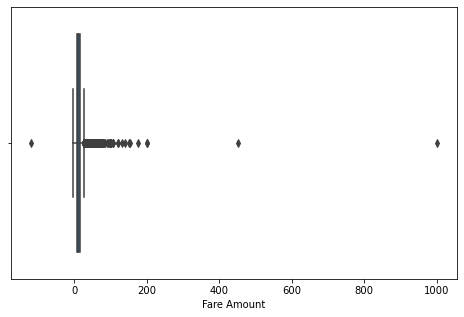

In [23]:
### YOUR CODE HERE ###
# Descriptive statistics for fare_amount
fare_stats = df0['fare_amount'].describe()
print(fare_stats)

# Box plot for fare_amount
plt.figure(figsize=(8, 5))
sns.boxplot(x=df0['fare_amount'])
plt.xlabel('Fare Amount')
plt.show()



**Question:** What do you notice about the values in the `fare_amount` column?

Impute values less than $0 with `0`.

In [24]:
# Impute values less than $0 with 0
### YOUR CODE HERE ###

# Impute values less than $0 with 0
df0.loc[df0['fare_amount'] < 0, 'fare_amount'] = 0


Now impute the maximum value as `Q3 + (6 * IQR)`.

In [26]:

'''    Impute upper-limit values in specified columns based on their interquartile range.

    Arguments:
        column_list: A list of columns to iterate over
        iqr_factor: A number representing x in the formula:
                    Q3 + (x * IQR). Used to determine maximum threshold,
                    beyond which a point is considered an outlier.

    The IQR is computed for each column in column_list and values exceeding
    the upper threshold for each column are imputed with the upper threshold value. '''
# Reassign minimum to zero
df0.loc[df0['fare_amount'] < 0, 'fare_amount'] = 0

# Calculate Q3 and IQR
Q3 = df0['fare_amount'].quantile(0.75)
IQR = df0['fare_amount'].quantile(0.75) - df0['fare_amount'].quantile(0.25)

# Calculate upper threshold
threshold = Q3 + (6 * IQR)

# Reassign values greater than threshold to threshold
df0.loc[df0['fare_amount'] > threshold, 'fare_amount'] = threshold

#### `duration` outliers


In [27]:
# Call .describe() for duration outliers
### YOUR CODE HERE ###
# Descriptive statistics for duration column
duration_stats = df0['duration'].describe()
print(duration_stats)

count                        22699
mean     0 days 00:17:00.826600290
std      0 days 01:01:59.788923306
min              -1 days +23:43:01
25%                0 days 00:06:39
50%                0 days 00:11:11
75%                0 days 00:18:23
max                0 days 23:59:33
Name: duration, dtype: object


The `duration` column has problematic values at both the lower and upper extremities.

* **Low values:** There should be no values that represent negative time. Impute all negative durations with `0`.

* **High values:** Impute high values the same way you imputed the high-end outliers for fares: `Q3 + (6 * IQR)`.

In [28]:

# Impute a 0 for any negative values
df0.loc[df0['duration'] < pd.Timedelta(0), 'duration'] = pd.Timedelta(0)


In [30]:
# Impute the high outliers
### YOUR CODE HERE ###
# Convert duration column to minutes
df0['duration'] = df0['duration'].dt.total_seconds() / 60
# Reassign values greater than threshold to threshold
df0.loc[df0['duration'] > threshold, 'duration'] = threshold


### Task 3a. Feature engineering

#### Create `mean_distance` column

When deployed, the model will not know the duration of a trip until after the trip occurs, so you cannot train a model that uses this feature. However, you can use the statistics of trips you *do* know to generalize about ones you do not know.

In this step, create a column called `mean_distance` that captures the mean distance for each group of trips that share pickup and dropoff points.

For example, if your data were:

|Trip|Start|End|Distance|
|--: |:---:|:-:|    |
| 1  | A   | B | 1  |
| 2  | C   | D | 2  |
| 3  | A   | B |1.5 |
| 4  | D   | C | 3  |

The results should be:
```
A -> B: 1.25 miles
C -> D: 2 miles
D -> C: 3 miles
```

Notice that C -> D is not the same as D -> C. All trips that share a unique pair of start and end points get grouped and averaged.

Then, a new column `mean_distance` will be added where the value at each row is the average for all trips with those pickup and dropoff locations:

|Trip|Start|End|Distance|mean_distance|
|--: |:---:|:-:|  :--   |:--   |
| 1  | A   | B | 1      | 1.25 |
| 2  | C   | D | 2      | 2    |
| 3  | A   | B |1.5     | 1.25 |
| 4  | D   | C | 3      | 3    |


Begin by creating a helper column called `pickup_dropoff`, which contains the unique combination of pickup and dropoff location IDs for each row.

One way to do this is to convert the pickup and dropoff location IDs to strings and join them, separated by a space. The space is to ensure that, for example, a trip with pickup/dropoff points of 12 & 151 gets encoded differently than a trip with points 121 & 51.

So, the new column would look like this:

|Trip|Start|End|pickup_dropoff|
|--: |:---:|:-:|  :--         |
| 1  | A   | B | 'A B'        |
| 2  | C   | D | 'C D'        |
| 3  | A   | B | 'A B'        |
| 4  | D   | C | 'D C'        |


In [33]:
# Create `pickup_dropoff` column
### YOUR CODE HERE ###
# Convert pickup and dropoff location IDs to strings and join them
df0['pickup_dropoff'] = df0['PULocationID'].astype(str) + ' ' + df0['DOLocationID'].astype(str)


Now, use a `groupby()` statement to group each row by the new `pickup_dropoff` column, compute the mean, and capture the values only in the `trip_distance` column. Assign the results to a variable named `grouped`.

In [41]:
### YOUR CODE HERE ###
grouped = df0.groupby('pickup_dropoff').mean(numeric_only=True)[['trip_distance']]
grouped[:5]

,trip_distance
pickup_dropoff,
1 1,2.433333
10 148,15.700000
100 1,16.890000
100 100,0.253333
100 107,1.180000


`grouped` is an object of the `DataFrame` class.

1. Convert it to a dictionary using the [`to_dict()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_dict.html) method. Assign the results to a variable called `grouped_dict`. This will result in a dictionary with a key of `trip_distance` whose values are another dictionary. The inner dictionary's keys are pickup/dropoff points and its values are mean distances. This is the information you want.

```
Example:
grouped_dict = {'trip_distance': {'A B': 1.25, 'C D': 2, 'D C': 3}
```

2. Reassign the `grouped_dict` dictionary so it contains only the inner dictionary. In other words, get rid of `trip_distance` as a key, so:

```
Example:
grouped_dict = {'A B': 1.25, 'C D': 2, 'D C': 3}
 ```

In [42]:
# 1. Convert `grouped` to a dictionary
grouped_dict = grouped.to_dict()

# 2. Reassign to only contain the inner dictionary
grouped_dict = grouped_dict['trip_distance']

1. Create a `mean_distance` column that is a copy of the `pickup_dropoff` helper column.

2. Use the [`map()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.map.html#pandas-series-map) method on the `mean_distance` series. Pass `grouped_dict` as its argument. Reassign the result back to the `mean_distance` series.
</br></br>
When you pass a dictionary to the `Series.map()` method, it will replace the data in the series where that data matches the dictionary's keys. The values that get imputed are the values of the dictionary.

```
Example:
df['mean_distance']
```

|mean_distance |
|  :-:         |
| 'A B'        |
| 'C D'        |
| 'A B'        |
| 'D C'        |
| 'E F'        |

```
grouped_dict = {'A B': 1.25, 'C D': 2, 'D C': 3}
df['mean_distance`] = df['mean_distance'].map(grouped_dict)
df['mean_distance']
```

|mean_distance |
|  :-:         |
| 1.25         |
| 2            |
| 1.25         |
| 3            |
| NaN          |

When used this way, the `map()` `Series` method is very similar to `replace()`, however, note that `map()` will impute `NaN` for any values in the series that do not have a corresponding key in the mapping dictionary, so be careful.

In [44]:
# Create a mean_distance column that is a copy of the pickup_dropoff helper column
df0['mean_distance'] = df0['pickup_dropoff']

# Map `grouped_dict` to the `mean_distance` column
df0['mean_distance'] = df0['mean_distance'].map(grouped_dict)

# Confirm that it worked
df0['mean_distance']

0         3.521667
1         3.108889
2         0.881429
3         3.700000
4         4.435000
           ...    
22694     1.098214
22695    18.757500
22696     0.684242
22697     2.077500
22698     1.476970
Name: mean_distance, Length: 22699, dtype: float64

#### Create `mean_duration` column

Repeat the process used to create the `mean_distance` column to create a `mean_duration` column.

In [45]:
# Create a mean_duration column that is a copy of the pickup_dropoff helper column
df0['mean_duration'] = df0['pickup_dropoff']

# Create a dictionary where keys are unique pickup_dropoffs and values are mean trip duration
mean_duration_dict = df0.groupby('pickup_dropoff')['duration'].mean().to_dict()

# Map mean_duration_dict to the mean_duration column
df0['mean_duration'] = df0['mean_duration'].map(mean_duration_dict)

# Confirm that it worked
print(df0['mean_duration'])

0        22.847222
1        24.470370
2         7.250000
3        30.250000
4        14.616667
           ...    
22694     8.594643
22695    53.831250
22696     6.609091
22697    16.650000
22698     9.405556
Name: mean_duration, Length: 22699, dtype: float64


#### Create `day` and `month` columns

Create two new columns, `day` (name of day) and `month` (name of month) by extracting the relevant information from the `tpep_pickup_datetime` column.

In [46]:
# Create 'day' col
df0['day'] = df0['tpep_pickup_datetime'].dt.day_name()

# Create 'month' col
df0['month'] = df0['tpep_pickup_datetime'].dt.month_name()

# Print the updated DataFrame
df0[['tpep_pickup_datetime', 'day', 'month']]


,tpep_pickup_datetime,day,month
0,2017-03-25 08:55:43,Saturday,March
1,2017-04-11 14:53:28,Tuesday,April
2,2017-12-15 07:26:56,Friday,December
3,2017-05-07 13:17:59,Sunday,May
4,2017-04-15 23:32:20,Saturday,April
...,...,...,...
22694,2017-02-24 17:37:23,Friday,February
22695,2017-08-06 16:43:59,Sunday,August
22696,2017-09-04 14:54:14,Monday,September
22697,2017-07-15 12:56:30,Saturday,July


#### Create `rush_hour` column

Define rush hour as:
* Any weekday (not Saturday or Sunday) AND
* Either from 06:00&ndash;10:00 or from 16:00&ndash;20:00

Create a binary `rush_hour` column that contains a 1 if the ride was during rush hour and a 0 if it was not.

In [47]:
# Create 'rush_hour' col
df0['rush_hour'] = (
    ((df0['tpep_pickup_datetime'].dt.weekday < 5) & (
        (df0['tpep_pickup_datetime'].dt.hour >= 6) & (df0['tpep_pickup_datetime'].dt.hour < 10) |
        (df0['tpep_pickup_datetime'].dt.hour >= 16) & (df0['tpep_pickup_datetime'].dt.hour < 20)
    )).astype(int)
)

# If day is Saturday or Sunday, impute 0 in 'rush_hour' column
df0.loc[df0['tpep_pickup_datetime'].dt.weekday >= 5, 'rush_hour'] = 0

# Print the updated DataFrame
print(df0[['tpep_pickup_datetime', 'rush_hour']])

      tpep_pickup_datetime  rush_hour
0      2017-03-25 08:55:43          0
1      2017-04-11 14:53:28          0
2      2017-12-15 07:26:56          1
3      2017-05-07 13:17:59          0
4      2017-04-15 23:32:20          0
...                    ...        ...
22694  2017-02-24 17:37:23          1
22695  2017-08-06 16:43:59          0
22696  2017-09-04 14:54:14          0
22697  2017-07-15 12:56:30          0
22698  2017-03-02 13:02:49          0

[22699 rows x 2 columns]


In [49]:
# Apply the `rush_hourizer()` function to the new column
### YOUR CODE HERE ###
# Create 'rush_hour' col
df0['rush_hour'] = (
    ((df0['tpep_pickup_datetime'].dt.weekday < 5) & (
        (df0['tpep_pickup_datetime'].dt.hour >= 6) & (df0['tpep_pickup_datetime'].dt.hour < 10) |
        (df0['tpep_pickup_datetime'].dt.hour >= 16) & (df0['tpep_pickup_datetime'].dt.hour < 20)
    )).astype(int)
)

# If day is Saturday or Sunday, impute 0 in 'rush_hour' column
df0.loc[df0['tpep_pickup_datetime'].dt.weekday >= 5, 'rush_hour'] = 0

# Print the updated DataFrame
df0[['tpep_pickup_datetime', 'rush_hour']]


,tpep_pickup_datetime,rush_hour
0,2017-03-25 08:55:43,0
1,2017-04-11 14:53:28,0
2,2017-12-15 07:26:56,1
3,2017-05-07 13:17:59,0
4,2017-04-15 23:32:20,0
...,...,...
22694,2017-02-24 17:37:23,1
22695,2017-08-06 16:43:59,0
22696,2017-09-04 14:54:14,0
22697,2017-07-15 12:56:30,0


### Task 4. Scatter plot

Create a scatterplot to visualize the relationship between `mean_duration` and `fare_amount`.

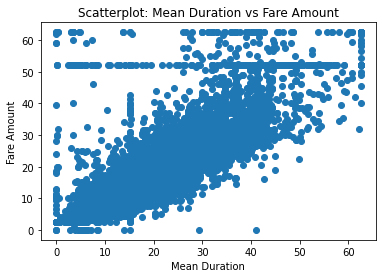

In [50]:
# Create a scatterplot to visualize the relationship between variables of interest
### YOUR CODE HERE ###

# Create a scatterplot
plt.scatter(df0['mean_duration'], df0['fare_amount'])
plt.xlabel('Mean Duration')
plt.ylabel('Fare Amount')
plt.title('Scatterplot: Mean Duration vs Fare Amount')

# Show the plot
plt.show()


The `mean_duration` variable correlates with the target variable. But what are the horizontal lines around fare amounts of 52 dollars and 63 dollars? What are the values and how many are there?

You know what one of the lines represents. 62 dollars and 50 cents is the maximum that was imputed for outliers, so all former outliers will now have fare amounts of \$62.50. What is the other line?

Check the value of the rides in the second horizontal line in the scatter plot.

In [51]:
# Filter the dataframe for rides with fare_amount equal to 62.50
fare_62_50 = df0[df0['fare_amount'] == 62.50]

# Get the unique fare amounts and their counts
fare_62_50_counts = fare_62_50['fare_amount'].value_counts()

# Filter the dataframe for rides with fare_amount equal to 63
fare_63 = df0[df0['fare_amount'] == 63]

# Get the unique fare amounts and their counts
fare_63_counts = fare_63['fare_amount'].value_counts()

print("Fare amount $62.50 counts:")
print(fare_62_50_counts)
print("\nFare amount $63 counts:")
print(fare_63_counts)


Fare amount $62.50 counts:
62.5    84
Name: fare_amount, dtype: int64

Fare amount $63 counts:
Series([], Name: fare_amount, dtype: int64)


Examine the first 30 of these trips.

In [54]:
# Set pandas to display all columns
### YOUR CODE HERE ###
pd.set_option('display.max_columns', None)
df0[df0['fare_amount']==52].head(30)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration,day,month,rush_hour
11,18600059,2,2017-03-05 19:15:30,2017-03-05 19:52:18,2,18.90,2,N,236,132,1,52.0,0.0,0.5,14.58,5.54,0.3,72.92,36.800000,236 132,19.211667,36.119444,Sunday,March,0
110,47959795,1,2017-06-03 14:24:57,2017-06-03 15:31:48,1,18.00,2,N,132,163,1,52.0,0.0,0.5,0.00,0.00,0.3,52.80,62.500000,132 163,19.229000,49.220000,Saturday,June,0
161,95729204,2,2017-11-11 20:16:16,2017-11-11 20:17:14,1,0.23,2,N,132,132,2,52.0,0.0,0.5,0.00,0.00,0.3,52.80,0.966667,132 132,2.255862,3.021839,Saturday,November,0
247,103404868,2,2017-12-06 23:37:08,2017-12-07 00:06:19,1,18.93,2,N,132,79,2,52.0,0.0,0.5,0.00,0.00,0.3,52.80,29.183333,132 79,19.431667,43.938889,Wednesday,December,0
379,80479432,2,2017-09-24 23:45:45,2017-09-25 00:15:14,1,17.99,2,N,132,234,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20,29.483333,132 234,17.654000,49.833333,Sunday,September,0
388,16226157,1,2017-02-28 18:30:05,2017-02-28 19:09:55,1,18.40,2,N,132,48,2,52.0,4.5,0.5,0.00,5.54,0.3,62.84,39.833333,132 48,18.761905,53.308730,Tuesday,February,1
406,55253442,2,2017-06-05 12:51:58,2017-06-05 13:07:35,1,4.73,2,N,228,88,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,15.616667,228 88,4.730000,15.616667,Monday,June,0
449,65900029,2,2017-08-03 22:47:14,2017-08-03 23:32:41,2,18.21,2,N,132,48,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,45.450000,132 48,18.761905,53.308730,Thursday,August,0
468,80904240,2,2017-09-26 13:48:26,2017-09-26 14:31:17,1,17.27,2,N,186,132,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,42.850000,186 132,17.096000,42.920000,Tuesday,September,0
520,33706214,2,2017-04-23 21:34:48,2017-04-23 22:46:23,6,18.34,2,N,132,148,1,52.0,0.0,0.5,5.00,0.00,0.3,57.80,62.500000,132 148,17.994286,45.042857,Sunday,April,0


**Question:** What do you notice about the first 30 trips?

==> It seems that almost all of the trips in the first 30 rows where the fare amount was $52 either begin or end at location 132, and all of them have a RatecodeID of 2.

There is no readily apparent reason why PULocation 132 should have so many fares of 52 dollars. They seem to occur on all different days, at different times, with both vendors, in all months. However, there are many toll amounts of  5.76 and 5.54. This would seem to indicate that location 132 is in an area that frequently requires tolls to get to and from. It's likely this is an airport.

The data dictionary says that RatecodeID of 2 indicates trips for JFK, which is John F. Kennedy International Airport. A quick Google search for 'new york city taxi flat rate '$52'' indicates that in 2017 (the year that this data was collected) there was indeed a flat fare for taxi trips between JFK airport (in Queens) and Manhattan.

Because RatecodeID is known from the data dictionary, the values for this rate code can be imputed back into the data after the model makes its predictions. This way you know that those data points will always be correct.

### Task 5. Isolate modeling variables

Drop features that are redundant, irrelevant, or that will not be available in a deployed environment.

In [55]:
df2 = df0.copy()

df2 = df2.drop(['Unnamed: 0', 'tpep_dropoff_datetime', 'tpep_pickup_datetime',
               'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID',
               'payment_type', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
               'total_amount', 'tpep_dropoff_datetime', 'tpep_pickup_datetime', 'duration',
               'pickup_dropoff', 'day', 'month'
               ], axis=1)

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VendorID         22699 non-null  int64  
 1   passenger_count  22699 non-null  int64  
 2   fare_amount      22699 non-null  float64
 3   mean_distance    22699 non-null  float64
 4   mean_duration    22699 non-null  float64
 5   rush_hour        22699 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 1.0 MB


In [ ]:
### YOUR CODE HERE ###

### Task 6. Pair plot

Create a pairplot to visualize pairwise relationships between `fare_amount`, `mean_duration`, and `mean_distance`.

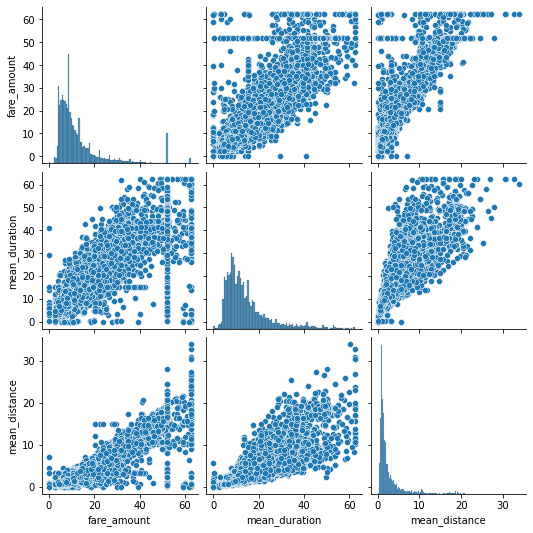

In [56]:
# Create a pairplot to visualize pairwise relationships between variables in the data
### YOUR CODE HERE ###
sns.pairplot(df2, vars=['fare_amount', 'mean_duration', 'mean_distance'])

These variables all show linear correlation with each other. Investigate this further.

### Task 7. Identify correlations

Next, code a correlation matrix to help determine most correlated variables.

In [57]:
# Correlation matrix to help determine most correlated variables
### YOUR CODE HERE ###

# Create a correlation matrix
corr_matrix = df2.corr()
corr_matrix

,VendorID,passenger_count,fare_amount,mean_distance,mean_duration,rush_hour
VendorID,1.000000,0.266463,0.001045,0.004741,0.001441,-0.002874
passenger_count,0.266463,1.000000,0.014942,0.013428,0.016116,-0.022035
fare_amount,0.001045,0.014942,1.000000,0.910185,0.862079,-0.020075
mean_distance,0.004741,0.013428,0.910185,1.000000,0.875900,-0.039725
mean_duration,0.001441,0.016116,0.862079,0.875900,1.000000,-0.023385
rush_hour,-0.002874,-0.022035,-0.020075,-0.039725,-0.023385,1.000000


Visualize a correlation heatmap of the data.

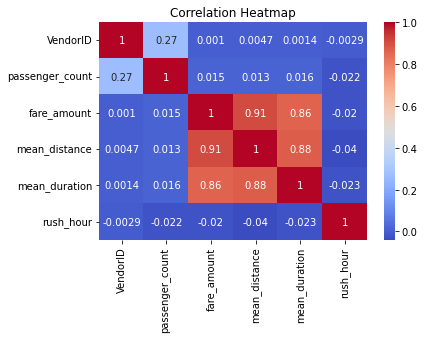

In [58]:
# Create correlation heatmap
### YOUR CODE HERE ###
import seaborn as sns
import matplotlib.pyplot as plt

# Create a correlation matrix
corr_matrix = df2.corr()

# Create a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Set the title of the heatmap
plt.title('Correlation Heatmap')

# Display the heatmap
plt.show()


**Question:** Which variable(s) are correlated with the target variable of `fare_amount`? 

mean_distance and mean_duration but both are also corelated with each other which is bad for Linear Regression Model

<img src="images/Construct.png" width="100" height="100" align=left>

## PACE: **Construct**

After analysis and deriving variables with close relationships, it is time to begin constructing the model. Consider the questions in your PACE Strategy Document to reflect on the Construct stage.


### Task 8a. Split data into outcome variable and features

In [59]:
### YOUR CODE HERE ###
df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VendorID         22699 non-null  int64  
 1   passenger_count  22699 non-null  int64  
 2   fare_amount      22699 non-null  float64
 3   mean_distance    22699 non-null  float64
 4   mean_duration    22699 non-null  float64
 5   rush_hour        22699 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 1.0 MB


Set your X and y variables. X represents the features and y represents the outcome (target) variable.

In [60]:
# Remove the target column from the features
# X = df2.drop(columns='fare_amount')
X = df2.drop(columns=['fare_amount'])

# Set y variable
y = df2[['fare_amount']]

# Display first few rows
X.head()


,VendorID,passenger_count,mean_distance,mean_duration,rush_hour
0,2,6,3.521667,22.847222,0
1,1,1,3.108889,24.470370,0
2,1,1,0.881429,7.250000,1
3,2,1,3.700000,30.250000,0
4,2,1,4.435000,14.616667,0


### Task 8b. Pre-process data


Dummy encode categorical variables

In [61]:
# Convert VendorID to string
X['VendorID'] = X['VendorID'].astype('string')

# Get dummies
X = pd.get_dummies(X, drop_first=True)
X.head()

,VendorID,passenger_count,mean_distance,mean_duration,rush_hour
0,2,6,3.521667,22.847222,0
1,1,1,3.108889,24.470370,0
2,1,1,0.881429,7.250000,1
3,2,1,3.700000,30.250000,0
4,2,1,4.435000,14.616667,0


### Normalize the data

Use `StandardScaler()` and `fit_transform()` to standardize the X variables. Assign the results to a variable called `X_scaled`.

In [63]:
# Standardize the X variables
### YOUR CODE HERE ###
# Standardize the X variables
### YOUR CODE HERE ###
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print('X scaled:', X_scaled)

X scaled: [[ 0.8931955   3.39065627  0.17093801  0.87797303 -0.64959666]
 [-1.11957573 -0.4997803   0.05495383  1.04518744 -0.64959666]
 [-1.11957573 -0.4997803  -0.57092814 -0.72883059  1.53941679]
 ...
 [ 0.8931955  -0.4997803  -0.62633441 -0.79485613 -0.64959666]
 [ 0.8931955  -0.4997803  -0.23485053  0.23954402 -0.64959666]
 [-1.11957573 -0.4997803  -0.40359028 -0.50676833 -0.64959666]]


### Split data into training and test sets

Create training and testing sets. The test set should contain 20% of the total samples. Set `random_state=0`.

In [64]:
# Create training and testing sets
#### YOUR CODE HERE ####
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)


Instantiate your model and fit it to the training data.

In [65]:
# Fit your model to the training data
### YOUR CODE HERE ###
# Fit your model to the training data

lr=LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Task 8c. Evaluate model

### Train data

Evaluate your model performance by calculating the residual sum of squares and the explained variance score (R^2). Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error.

In [70]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

# Predict the target variable for the test set using your model
y_pred = lr.predict(X_test)

# Calculate the RSS
rss = np.sum((y_test - y_pred) ** 2)

# Calculate the R^2 score
r2 = explained_variance_score(y_test, y_pred)

# Calculate the MAE
mae = mean_absolute_error(y_test, y_pred)

# Calculate the MSE
mse = mean_squared_error(y_test, y_pred)

# Calculate the RMSE
rmse = np.sqrt(mse)


print("Residual Sum of Squares (RSS):", rss)
print("Explained Variance Score (R^2):", r2)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Residual Sum of Squares (RSS): fare_amount    64201.202538
dtype: float64
Explained Variance Score (R^2): 0.8699636198780322
Mean Absolute Error (MAE): 2.1105560277668083
Mean Squared Error (MSE): 14.141234039249762
Root Mean Squared Error (RMSE): 3.7604832188496418


### Test data

Calculate the same metrics on the test data.

In [72]:
# Evaluate the model performance on the testing data
### YOUR CODE HERE ###

# Predict the target variable for the test data using your model
y_pred_test = lr.predict(X_test)

# Calculate the RSS for the test data
rss_test = np.sum((y_test - y_pred_test) ** 2)

# Calculate the R^2 score for the test data
r2_test = explained_variance_score(y_test, y_pred_test)

# Calculate the MAE for the test data
mae_test = mean_absolute_error(y_test, y_pred_test)

# Calculate the MSE for the test data
mse_test = mean_squared_error(y_test, y_pred_test)

# Calculate the RMSE for the test data
rmse_test = np.sqrt(mse_test)

# Print the evaluation metrics for the test data
print("Test Data Metrics:")
print("Residual Sum of Squares (RSS):", rss_test)
print("Explained Variance Score (R^2):", r2_test)
print("Mean Absolute Error (MAE):", mae_test)
print("Mean Squared Error (MSE):", mse_test)
print("Root Mean Squared Error (RMSE):", rmse_test)


Test Data Metrics:
Residual Sum of Squares (RSS): fare_amount    64201.202538
dtype: float64
Explained Variance Score (R^2): 0.8699636198780322
Mean Absolute Error (MAE): 2.1105560277668083
Mean Squared Error (MSE): 14.141234039249762
Root Mean Squared Error (RMSE): 3.7604832188496418


<img src="images/Execute.png" width="100" height="100" align=left>

## PACE: **Execute**

Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### Task 9a. Results

Use the code cell below to get `actual`,`predicted`, and `residual` for the testing set, and store them as columns in a `results` dataframe.

In [74]:
# Create a `results` dataframe
### YOUR CODE HERE ###

results = pd.DataFrame(data={'actual': y_test['fare_amount'],
                             'predicted': y_pred_test.ravel()})
results['residual'] = results['actual'] - results['predicted']
results.head()

,actual,predicted,residual
5818,14.0,12.374249,1.625751
18134,28.0,16.520066,11.479934
4655,5.5,6.666780,-1.166780
7378,15.5,16.239917,-0.739917
13914,9.5,10.558662,-1.058662


### Task 9b. Visualize model results

Create a scatterplot to visualize `actual` vs. `predicted`.

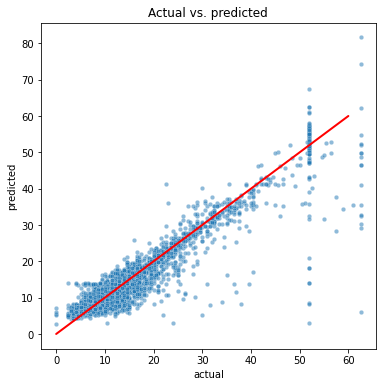

In [75]:
# Create a scatterplot to visualize `predicted` over `actual`
### YOUR CODE HERE ###

fig, ax = plt.subplots(figsize=(6, 6))
sns.set(style='whitegrid')
sns.scatterplot(x='actual',
                y='predicted',
                data=results,
                s=20,
                alpha=0.5,
                ax=ax
)
plt.plot([0,60], [0,60], c='red', linewidth=2)
plt.title('Actual vs. predicted');

Visualize the distribution of the `residuals` using a histogram.

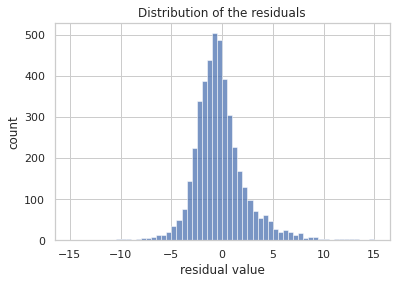

In [76]:
# Visualize the distribution of the `residuals`
### YOUR CODE HERE ###
sns.histplot(results['residual'], bins=np.arange(-15,15.5,0.5))
plt.title('Distribution of the residuals')
plt.xlabel('residual value')
plt.ylabel('count');


In [77]:
# Calculate residual mean
### YOUR CODE HERE ###
results['residual'].mean()

-0.014853653348429674

Create a scatterplot of `residuals` over `predicted`.

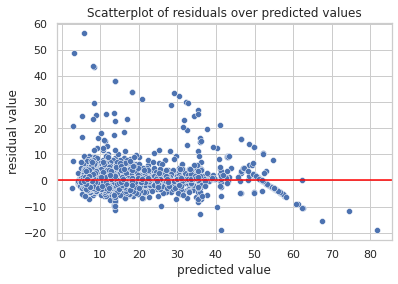

In [78]:
# Create a scatterplot of `residuals` over `predicted`
### YOUR CODE HERE ###

sns.scatterplot(x='predicted', y='residual', data=results)
plt.axhline(0, c='red')
plt.title('Scatterplot of residuals over predicted values')
plt.xlabel('predicted value')
plt.ylabel('residual value')
plt.show()

### Task 9c. Coefficients

Use the `coef_` attribute to get the model's coefficients. The coefficients are output in the order of the features that were used to train the model. Which feature had the greatest effect on trip fare?

In [79]:
# Output the model's coefficients

# Get model coefficients
coef = pd.DataFrame(lr.coef_, columns=X.columns)
coef

,VendorID,passenger_count,mean_distance,mean_duration,rush_hour
0,-0.051606,0.02886,7.004402,2.912249,0.114678


The coefficients reveal that `mean_distance` was the feature with the greatest weight in the model's final prediction. For every mile traveled, the fare amount increases by a mean of \\$7. Note, however, that because some highly correlated features were not removed, the confidence interval of this assessment is wider.

### Task 9d. Conclusion

1. What are the key takeaways from this notebook?



2. What results can be presented from this notebook?



1. Multiple linear regression is a powerful tool to estimate a dependent continous variable from several independent variables.
Exploratory data analysis is useful for selecting both numeric and categorical features for multiple linear regression.
Fitting multiple linear regression models may require trial and error to select variables that fit an accurate model while maintaining model assumptions (or not, depending on your use case).